# Leadangle_fitplot.ipynb

`Leadangle_fit.py`で計算した結果をプロットする。

In [2]:
import numpy as np
import math
import copy
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator
from matplotlib.colors import LinearSegmentedColormap  # colormapをカスタマイズする
import matplotlib.colors as colors
import matplotlib.patheffects as pe
import B_JRM33 as BJRM
import B_equator as BEQ
import Leadangle_wave as LeadA
from TScmap import TScmap

# matplotlib フォント設定
fontname = 'Nimbus Sans'
plt.rcParams.update({'font.sans-serif': fontname,
                     'font.family': 'sans-serif',
                     'mathtext.fontset': 'custom',
                     'mathtext.rm': fontname,
                     'mathtext.it': fontname+':italic',
                     # 'mathtext.bf': 'Nimbus Sans:italic:bold',
                     'mathtext.bf': fontname+':bold'
                     })
params = {
    # 'lines.markersize': 1,
    # 'lines.linewidth': 1,
    'axes.linewidth': 2,
    'xtick.major.size': 5,
    'xtick.minor.size': 3.5,
    'xtick.major.width': 2.0,
    'xtick.minor.width': 1.25,
    'ytick.major.size': 5,
    'ytick.minor.size': 3,
    'ytick.major.width': 2.0,
    'ytick.minor.width': 1.25,
}
plt.rcParams.update(params)

def generate_cmap(colors):
    """自分で定義したカラーマップを返す"""
    values = range(len(colors))

    vmax = np.ceil(np.max(values))
    color_list = []
    for v, c in zip(values, colors):
        color_list.append((v / vmax, c))
    return LinearSegmentedColormap.from_list('custom_cmap', color_list)

whiteblue=generate_cmap(['#000000','#010E5E','#042AA6','#0F7CE0','#1AC7FF','#FFFFFF'])

[]

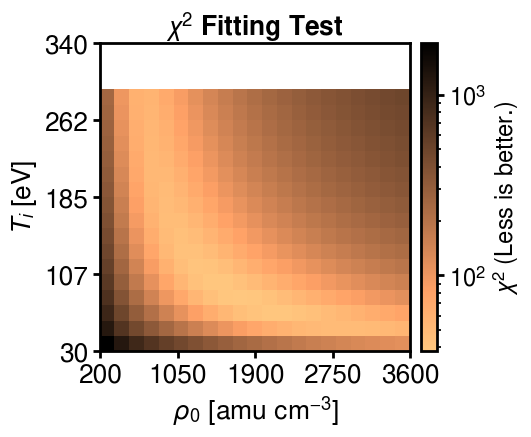

In [3]:
chi2 = np.loadtxt('img/LeadangleFit/test2/params_chi2.txt')
RHO0 = np.loadtxt('img/LeadangleFit/test2/params_RHO0.txt')
Ti0 = np.loadtxt('img/LeadangleFit/test2/params_Ti0.txt')

# chi square 0 is not true value.
chi2min = np.min(chi2[np.where(chi2>0)])
chi2max = np.max(chi2)
chi2ave = np.average(chi2)
chi2[np.where(chi2==0)] = np.nan

# Plot
fontsize = 19
fig, ax = plt.subplots(figsize=(4,4), dpi=100)
ax.tick_params(axis='both', labelsize=fontsize)
ax.set_title('$\\chi^2$ Fitting Test', weight='bold', fontsize=fontsize)
ax.set_xlabel('$\\rho_{\,0}$ [amu cm$^{-3}$]', fontsize=fontsize)
ax.set_ylabel('$T_i$ [eV]', fontsize=fontsize)
ax.set_xticks(np.linspace(0,chi2.shape[1],5))
ax.set_xticklabels(np.linspace(np.min(RHO0),np.max(RHO0),5,dtype=int))
ax.set_yticks(np.linspace(0,chi2.shape[0],5))
ax.set_yticklabels(np.linspace(np.min(Ti0),np.max(Ti0),5,dtype=int))
sm = ax.pcolor(chi2, cmap='copper_r', norm=colors.LogNorm(vmin=chi2min, vmax=chi2max))

axpos = ax.get_position()
cax = fig.add_axes([axpos.x1*1.03, axpos.y0, 0.04, axpos.y1-axpos.y0])
pp = fig.colorbar(sm, cax=cax)
pp.set_label('$\\chi^2$ (Less is better.)', fontsize=fontsize*0.9)
pp.ax.tick_params(labelsize=fontsize*0.9)
pp.ax.yaxis.get_offset_text().set_fontsize(fontsize*0.9)  # 指数部のフォントサイズ

plt.plot()

[]

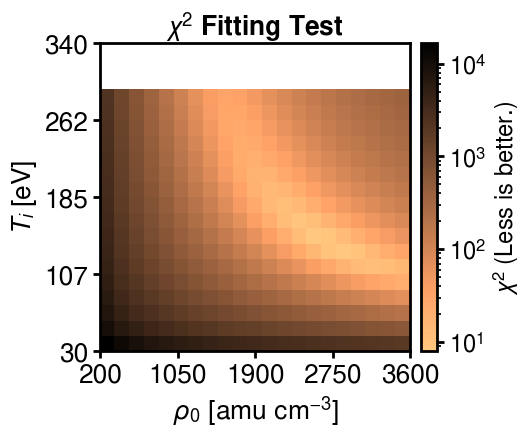

In [42]:
chi2 = np.loadtxt('img/LeadangleFit/test4/params_chi2.txt')
RHO0 = np.loadtxt('img/LeadangleFit/test4/params_RHO0.txt')
Ti0 = np.loadtxt('img/LeadangleFit/test4/params_Ti0.txt')

# chi square 0 is not true value.
chi2min = np.min(chi2[np.where(chi2>0)])
chi2max = np.max(chi2)
chi2ave = np.average(chi2)
chi2[np.where(chi2==0)] = np.nan

# Plot
fontsize = 19
fig, ax = plt.subplots(figsize=(4,4), dpi=100)
ax.tick_params(axis='both', labelsize=fontsize)
ax.set_title('$\\chi^2$ Fitting Test', weight='bold', fontsize=fontsize)
ax.set_xlabel('$\\rho_{\,0}$ [amu cm$^{-3}$]', fontsize=fontsize)
ax.set_ylabel('$T_i$ [eV]', fontsize=fontsize)
ax.set_xticks(np.linspace(0,chi2.shape[1],5))
ax.set_xticklabels(np.linspace(np.min(RHO0),np.max(RHO0),5,dtype=int))
ax.set_yticks(np.linspace(0,chi2.shape[0],5))
ax.set_yticklabels(np.linspace(np.min(Ti0),np.max(Ti0),5,dtype=int))
sm = ax.pcolor(chi2, cmap='copper_r', norm=colors.LogNorm(vmin=chi2min, vmax=chi2max))

axpos = ax.get_position()
cax = fig.add_axes([axpos.x1*1.03, axpos.y0, 0.04, axpos.y1-axpos.y0])
pp = fig.colorbar(sm, cax=cax)
pp.set_label('$\\chi^2$ (Less is better.)', fontsize=fontsize*0.9)
pp.ax.tick_params(labelsize=fontsize*0.9)
pp.ax.yaxis.get_offset_text().set_fontsize(fontsize*0.9)  # 指数部のフォントサイズ

plt.plot()

In [29]:
from scipy import stats
print(stats.chi2.pdf(30, 2))

1.5295116025091287e-07


In [7]:
from scipy import stats
print(stats.chi2.pdf(9.458, 3))

0.01084004576524119


In [8]:
from scipy import stats
print(stats.chi2.pdf(3.84, 1))

0.029846887483060566


[]

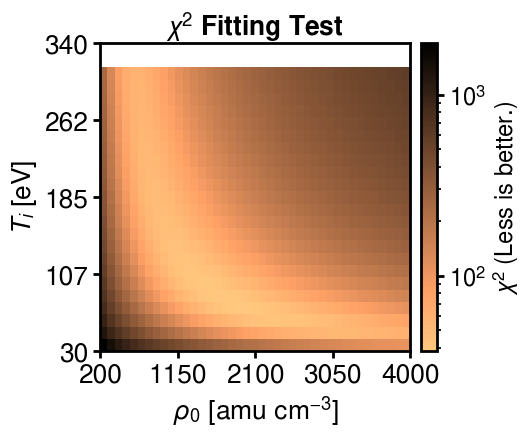

In [43]:
chi2 = np.loadtxt('img/LeadangleFit/2014_1/params_chi2.txt')
RHO0 = np.loadtxt('img/LeadangleFit/2014_1/params_RHO0.txt')
Ti0 = np.loadtxt('img/LeadangleFit/2014_1/params_Ti0.txt')

# chi square 0 is not true value.
chi2min = np.min(chi2[np.where(chi2>0)])
chi2max = np.max(chi2)
chi2ave = np.average(chi2)
chi2[np.where(chi2==0)] = np.nan

# Plot
fontsize = 19
fig, ax = plt.subplots(figsize=(4,4), dpi=100)
ax.tick_params(axis='both', labelsize=fontsize)
ax.set_title('$\\chi^2$ Fitting Test', weight='bold', fontsize=fontsize)
ax.set_xlabel('$\\rho_{\,0}$ [amu cm$^{-3}$]', fontsize=fontsize)
ax.set_ylabel('$T_i$ [eV]', fontsize=fontsize)
ax.set_xticks(np.linspace(0,chi2.shape[1],5))
ax.set_xticklabels(np.linspace(np.min(RHO0),np.max(RHO0),5,dtype=int))
ax.set_yticks(np.linspace(0,chi2.shape[0],5))
ax.set_yticklabels(np.linspace(np.min(Ti0),np.max(Ti0),5,dtype=int))
sm = ax.pcolor(chi2, cmap='copper_r', norm=colors.LogNorm(vmin=chi2min, vmax=chi2max))

axpos = ax.get_position()
cax = fig.add_axes([axpos.x1*1.03, axpos.y0, 0.04, axpos.y1-axpos.y0])
pp = fig.colorbar(sm, cax=cax)
pp.set_label('$\\chi^2$ (Less is better.)', fontsize=fontsize*0.9)
pp.ax.tick_params(labelsize=fontsize*0.9)
pp.ax.yaxis.get_offset_text().set_fontsize(fontsize*0.9)  # 指数部のフォントサイズ

plt.plot()

[]

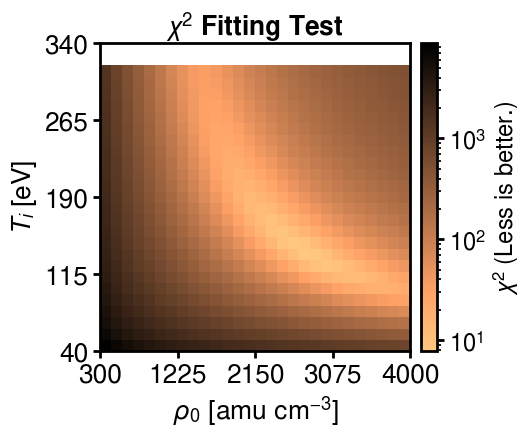

In [41]:
chi2 = np.loadtxt('img/LeadangleFit/2022_1/params_chi2.txt')
RHO0 = np.loadtxt('img/LeadangleFit/2022_1/params_RHO0.txt')
Ti0 = np.loadtxt('img/LeadangleFit/2022_1/params_Ti0.txt')

# chi square 0 is not true value.
chi2min = np.min(chi2[np.where(chi2>0)])
chi2max = np.max(chi2)
chi2ave = np.average(chi2)
chi2[np.where(chi2==0)] = np.nan

# Plot
fontsize = 19
fig, ax = plt.subplots(figsize=(4,4), dpi=100)
ax.tick_params(axis='both', labelsize=fontsize)
ax.set_title('$\\chi^2$ Fitting Test', weight='bold', fontsize=fontsize)
ax.set_xlabel('$\\rho_{\,0}$ [amu cm$^{-3}$]', fontsize=fontsize)
ax.set_ylabel('$T_i$ [eV]', fontsize=fontsize)
ax.set_xticks(np.linspace(0,chi2.shape[1],5))
ax.set_xticklabels(np.linspace(np.min(RHO0),np.max(RHO0),5,dtype=int))
ax.set_yticks(np.linspace(0,chi2.shape[0],5))
ax.set_yticklabels(np.linspace(np.min(Ti0),np.max(Ti0),5,dtype=int))
sm = ax.pcolor(chi2, cmap='copper_r', norm=colors.LogNorm(vmin=chi2min, vmax=chi2max))

axpos = ax.get_position()
cax = fig.add_axes([axpos.x1*1.03, axpos.y0, 0.04, axpos.y1-axpos.y0])
pp = fig.colorbar(sm, cax=cax)
pp.set_label('$\\chi^2$ (Less is better.)', fontsize=fontsize*0.9)
pp.ax.tick_params(labelsize=fontsize*0.9)
pp.ax.yaxis.get_offset_text().set_fontsize(fontsize*0.9)  # 指数部のフォントサイズ

plt.plot()

[]

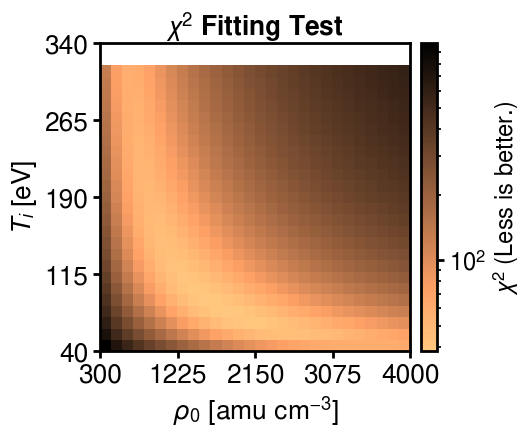

In [48]:
chi2 = np.loadtxt('img/LeadangleFit/2014_2/params_chi2.txt')
RHO0 = np.loadtxt('img/LeadangleFit/2014_2/params_RHO0.txt')
Ti0 = np.loadtxt('img/LeadangleFit/2014_2/params_Ti0.txt')

# chi square 0 is not true value.
chi2min = np.min(chi2[np.where(chi2>0)])
chi2max = np.max(chi2)
chi2ave = np.average(chi2)
chi2[np.where(chi2==0)] = np.nan

# Plot
fontsize = 19
fig, ax = plt.subplots(figsize=(4,4), dpi=100)
ax.tick_params(axis='both', labelsize=fontsize)
ax.set_title('$\\chi^2$ Fitting Test', weight='bold', fontsize=fontsize)
ax.set_xlabel('$\\rho_{\,0}$ [amu cm$^{-3}$]', fontsize=fontsize)
ax.set_ylabel('$T_i$ [eV]', fontsize=fontsize)
ax.set_xticks(np.linspace(0,chi2.shape[1],5))
ax.set_xticklabels(np.linspace(np.min(RHO0),np.max(RHO0),5,dtype=int))
ax.set_yticks(np.linspace(0,chi2.shape[0],5))
ax.set_yticklabels(np.linspace(np.min(Ti0),np.max(Ti0),5,dtype=int))
sm = ax.pcolor(chi2, cmap='copper_r', norm=colors.LogNorm(vmin=chi2min, vmax=chi2max))

axpos = ax.get_position()
cax = fig.add_axes([axpos.x1*1.03, axpos.y0, 0.04, axpos.y1-axpos.y0])
pp = fig.colorbar(sm, cax=cax)
pp.set_label('$\\chi^2$ (Less is better.)', fontsize=fontsize*0.9)
pp.ax.tick_params(labelsize=fontsize*0.9)
pp.ax.yaxis.get_offset_text().set_fontsize(fontsize*0.9)  # 指数部のフォントサイズ

plt.plot()